# All model related tasks here

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv('/content/preprocessed_data.csv')

In [35]:
data = pd.read_csv('/content/preprocessed_data.csv')

In [36]:
y = data['HeartDisease']
X = data.drop('HeartDisease', axis=1)

In [37]:
#splitting data for training and testing, with 20% seperated for testing
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training logistic regression
model = LogisticRegression()
model.fit(X_train_all, y_train)

LogisticRegression()

In [38]:
# Function to print out metrics for each experiment

def get_metrics(true_labels, predictions):
    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    print(f"Accuracy: {accuracy} \nF1: {f1} \nPrecision: {precision} \nRecall: {recall}")

In [39]:
#predictions on the test set
y_pred = model.predict(X_test_all)

In [40]:
get_metrics(y_test, y_pred)

Accuracy: 0.8532608695652174 
F1: 0.8695652173913043 
Precision: 0.9 
Recall: 0.8411214953271028


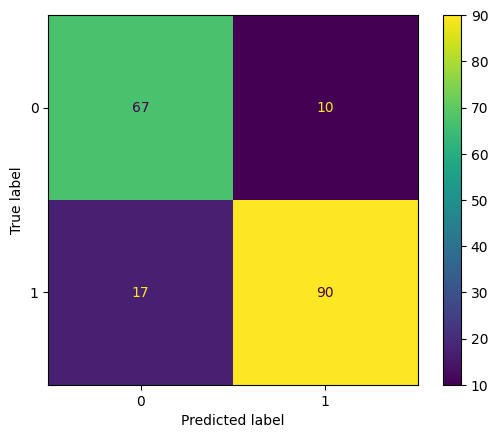

In [41]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [42]:
#correlation is calculated here to extract features with high correlation
correlation = data.corr()['HeartDisease'].sort_values(ascending=False)
print(correlation)

HeartDisease          1.000000
ST_Slope_Flat         0.554134
ChestPainType_ASY     0.516716
ExerciseAngina_Y      0.494282
scaled_Oldpeak        0.403951
Sex_M                 0.305445
scaled_Age            0.282039
FastingBS_1           0.267291
ST_Slope_Down         0.122527
scaled_RestingBP      0.107589
RestingECG_ST         0.102527
RestingECG_LVH        0.010670
ChestPainType_TA     -0.054790
RestingECG_Normal    -0.091580
ChestPainType_NAP    -0.212964
scaled_Cholesterol   -0.232741
FastingBS_0          -0.267291
Sex_F                -0.305445
scaled_MaxHR         -0.400421
ChestPainType_ATA    -0.401924
ExerciseAngina_N     -0.494282
ST_Slope_Up          -0.622164
Name: HeartDisease, dtype: float64


In [43]:
#process for logistic regression starts here

#features with correlation higher than 0.25 with heart disease is done
high_corr_features = correlation[abs(correlation) > 0.25].index.tolist()
high_corr_features.remove('HeartDisease')

In [44]:
# feature matrix for X and Y is selected here
X = data[high_corr_features]
y = data['HeartDisease']

In [45]:
#splitting data for training and testing, with 20% seperated for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
#predictions on the test set
y_pred = model.predict(X_test)

In [47]:
get_metrics(y_test, y_pred)

Accuracy: 0.8586956521739131 
F1: 0.8737864077669902 
Precision: 0.9090909090909091 
Recall: 0.8411214953271028


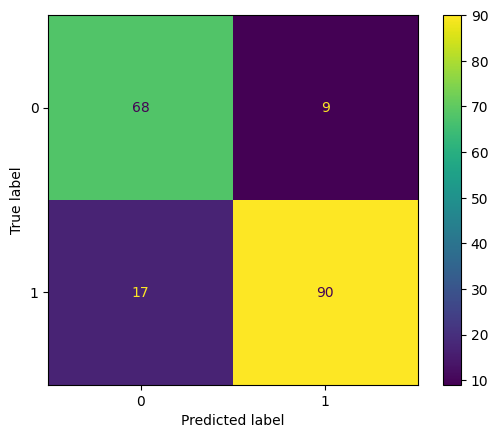

In [48]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [49]:
from sklearn.feature_selection import SequentialFeatureSelector

In [50]:
logisticModel = LogisticRegression()
sfs = SequentialFeatureSelector(estimator=LogisticRegression(), direction='backward')
sfs.fit(X_train_all, y_train)

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression())

In [51]:
cols = X_train_all.columns[sfs.support_]
cols

Index(['scaled_Age', 'scaled_Cholesterol', 'scaled_Oldpeak', 'FastingBS_0',
       'FastingBS_1', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'RestingECG_LVH'],
      dtype='object')

In [53]:
logisticModel.fit(X_train_all[cols], y_train)

LogisticRegression()

In [55]:
y_pred = logisticModel.predict(X_test_all[cols])
get_metrics(y_test, y_pred)

Accuracy: 0.8532608695652174 
F1: 0.8720379146919431 
Precision: 0.8846153846153846 
Recall: 0.8598130841121495


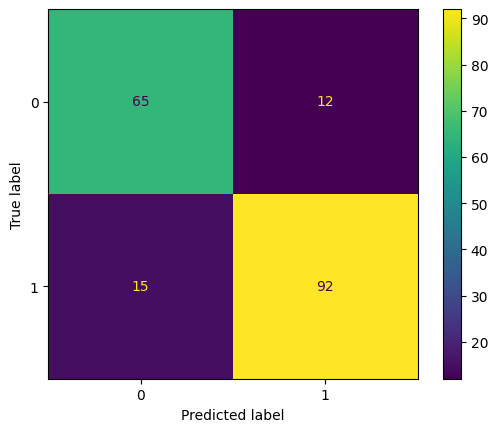

In [56]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()